In [1]:
import numpy as np
import matplotlib.pyplot as plt

#It would be useful (not mandatory) for your learning and for your thesis if you could represent the paths 
#taken by the agent graphically, perhaps at different stages of the learning. 
#One thing that is essential is for you to track the reward function, q values, and any other game parameters, 
#like how many steps it takes your agent to reach the goal.

In [2]:
#define actions
#actions: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

In [3]:
#define a function that determines if the specified location is a terminal state (terminal state meaning a wall)
def is_terminal_state(current_row_index, current_column_index):
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  #make sure that the chosen state isn't a terminal state
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.(i.e. explotation)
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action(i.e. exploration)
    return np.random.randint(4)

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#Define a function that will get the shortest path between any location and the exit
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
      if len(shortest_path) > (environment_rows * environment_columns):
        return shortest_path
    return shortest_path


def draw_shortest_path():
    shortest_path1 = get_shortest_path(0, 3)
    shortest_path2 = get_shortest_path(0, 5)
    shortest_path3 = get_shortest_path(0, 1)

    if shortest_path1:
        #print(shortest_path1) #maze 1
        for i in shortest_path1:
            data[i[0], i[1]] = 0.4

    if shortest_path2:
        #print(shortest_path2) #maze 2
        for i in shortest_path2:
            data[i[0], i[1]] = 0.4

    if shortest_path3:
        #print(shortest_path3) #maze 3
        for i in shortest_path3:
            data[i[0], i[1]] = 0.4
        data[0][1] = 1

    plt.imshow(data, interpolation='nearest', cmap='hot')

MAZE 1: (imperfect maze)

[-100. -100. -100.   -1. -100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1. -100.   -1.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1. -100.   -1. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1.   -1. -100.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100.]
[-100.   -1. -100.   -1. -100.   -1. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100. -100. -100. -100. -100.  100. -100. -100.]


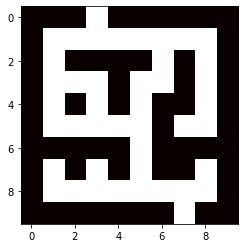

In [4]:
#define the shape of the maze/enviroment (i.e., its states)
environment_rows = 10
environment_columns = 10

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
q_values = np.zeros((environment_rows, environment_columns, 4))

#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 10 rows and 10 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[9, 7] = 100. #set the reward for the exit (i.e., the goal) to 100

#define walkable locations (i.e., white squares) for rows 0 through 8
maze = {} #walkable locations in a dictionary
maze[0] = [3] #this is also the start
maze[1] = [i for i in range(1,9)]
maze[2] = [1, 6, 8]
maze[3] = [1, 2, 3, 5, 6, 8]
maze[4] = [1, 3, 5, 8]
maze[5] = [1, 2, 3, 4, 5, 7, 8]
maze[6] = [5]
maze[7] = [1, 3, 5, 8]
maze[8] = [i for i in range(1,9)]

#set the rewards for all locations (i.e., white squares)
for row_index in range(0,9):
    for column_index in maze[row_index]:
        rewards[row_index, column_index] = -1

#print rewards matrix (you can see the maze)
for row in rewards:
    print(row)

    
data = np.zeros((environment_columns, environment_rows))
for j in range(environment_rows):
    for i in range(environment_columns):
        if rewards[j][i] == -100:
            data[j][i] = 0
        else:
            data[j][i] = 1
    

plt.imshow(data, interpolation='nearest', cmap='hot')

MAZE 2: (perfect maze)

[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100.   -1. -100.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1.   -1.   -1. -100.   -1. -100.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1. -100. -100. -100. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1.   -1.   -1. -100.]
[-100. -100. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100. -100. -100. -100. -100.  100. -100. -100. -100.]


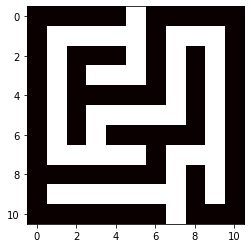

In [15]:
#define the shape of the maze/enviroment (i.e., its states)
environment_rows = 11
environment_columns = 11

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
q_values = np.zeros((environment_rows, environment_columns, 4))

#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 10 rows and 10 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[10, 7] = 100. #set the reward for the exit (i.e., the goal) to 100

#define walkable locations (i.e., white squares) for rows 0 through 8
maze = {} #walkable locations in a dictionary
maze[0] = [5] #this is also the start
maze[1] = [1, 2, 3, 4, 5, 7, 8, 9]
maze[2] = [1, 5, 7, 9]
maze[3] = [1, 3, 4, 5, 7, 9]
maze[4] = [1, 7, 9]
maze[5] = [1, 3, 4, 5, 6, 7, 9]
maze[6] = [1, 3, 9]
maze[7] = [1, 2, 3, 4, 5, 7, 8, 9]
maze[8] = [7, 9]
maze[9] = [1, 2, 3, 4, 5, 6, 7, 9]

#set the rewards for all locations (i.e., white squares)
for row_index in range(0,10):
    for column_index in maze[row_index]:
        rewards[row_index, column_index] = -1

#print rewards matrix (you can see the maze)
for row in rewards:
    print(row)
    
data = np.zeros((environment_columns, environment_rows))
for j in range(environment_rows):
    for i in range(environment_columns):
        if rewards[j][i] == -100:
            data[j][i] = 0
        else:
            data[j][i] = 1
    

plt.imshow(data, interpolation='nearest', cmap='hot')

MAZE 3: (continuous maze)

[-100.   -1. -100. -100. -100. -100. -100. -100. -100. -100. -100.]
[-100.   -1. -100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100.   -1. -100. -100. -100. -100. -100.   -1. -100.]
[-100.   -1. -100.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.   -1. -100.]
[-100. -100. -100. -100. -100.   -1. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100.  100. -100.]


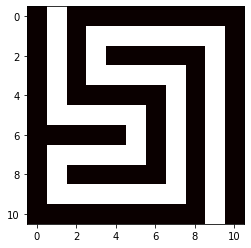

In [18]:
#define the shape of the maze/enviroment (i.e., its states)
environment_rows = 11
environment_columns = 11

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
q_values = np.zeros((environment_rows, environment_columns, 4))

#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 10 rows and 10 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[10, 9] = 100. #set the reward for the exit (i.e., the goal) to 100

#define walkable locations (i.e., white squares) for rows 0 through 8
maze = {} #walkable locations in a dictionary
maze[0] = [1] #this is also the start
maze[1] = [1, 3, 4, 5, 6, 7, 8, 9]
maze[2] = [1, 3, 9]
maze[3] = [1, 3, 4, 5, 6, 7, 9]
maze[4] = [1, 7, 9]
maze[5] = [1, 2, 3, 4, 5, 7, 9]
maze[6] = [5, 7, 9]
maze[7] = [1, 2, 3, 4, 5, 7, 9]
maze[8] = [1, 7, 9]
maze[9] = [1, 2, 3, 4, 5, 6, 7, 9]

#set the rewards for all locations (i.e., white squares)
for row_index in range(0,10):
    for column_index in maze[row_index]:
        rewards[row_index, column_index] = -1

#print rewards matrix (you can see the maze)
for row in rewards:
    print(row)
    
data = np.zeros((environment_columns, environment_rows))
for j in range(environment_rows):
    for i in range(environment_columns):
        if rewards[j][i] == -100:
            data[j][i] = 0
        else:
            data[j][i] = 1
    

plt.imshow(data, interpolation='nearest', cmap='hot')

RUN ONE OF THE 3 MAZES AND THEN RUN THE CELL BELOW TO TRAIN THE AGENT ON THE CHOSEN MAZE

Index:  0 , Episode:  0 Rewards-- min:  -102.0  max:  -102.0  avg:  -10.2
Index:  1 , Episode:  10 Rewards-- min:  -105.0  max:  -100.0  avg:  -101.2
Index:  2 , Episode:  20 Rewards-- min:  -103.0  max:  -100.0  avg:  -101.2
Index:  3 , Episode:  30 Rewards-- min:  -105.0  max:  -100.0  avg:  -100.9
Index:  4 , Episode:  40 Rewards-- min:  -103.0  max:  -100.0  avg:  -100.5
Index:  5 , Episode:  50 Rewards-- min:  -105.0  max:  -100.0  avg:  -101.4
Index:  6 , Episode:  60 Rewards-- min:  -105.0  max:  -100.0  avg:  -101.4
Index:  7 , Episode:  70 Rewards-- min:  -104.0  max:  -100.0  avg:  -100.9
Index:  8 , Episode:  80 Rewards-- min:  -104.0  max:  -100.0  avg:  -101.5
Index:  9 , Episode:  90 Rewards-- min:  -102.0  max:  -100.0  avg:  -100.8
Index:  10 , Episode:  100 Rewards-- min:  -102.0  max:  -100.0  avg:  -100.7
Index:  11 , Episode:  110 Rewards-- min:  -106.0  max:  -100.0  avg:  -101.6
Index:  12 , Episode:  120 Rewards-- min:  -105.0  max:  -100.0  avg:  -101.5
Index:  

Index:  157 , Episode:  1570 Rewards-- min:  -164.0  max:  -118.0  avg:  -145.7
Index:  158 , Episode:  1580 Rewards-- min:  -165.0  max:  46.0  avg:  -121.3
Index:  159 , Episode:  1590 Rewards-- min:  -127.0  max:  43.0  avg:  -8.6
Index:  160 , Episode:  1600 Rewards-- min:  -134.0  max:  47.0  avg:  -56.3
Index:  161 , Episode:  1610 Rewards-- min:  35.0  max:  47.0  avg:  42.8
Index:  162 , Episode:  1620 Rewards-- min:  41.0  max:  49.0  avg:  45.7
Index:  163 , Episode:  1630 Rewards-- min:  43.0  max:  51.0  avg:  47.9
Index:  164 , Episode:  1640 Rewards-- min:  45.0  max:  51.0  avg:  49.4
Index:  165 , Episode:  1650 Rewards-- min:  51.0  max:  51.0  avg:  51.0
Index:  166 , Episode:  1660 Rewards-- min:  51.0  max:  51.0  avg:  51.0
Index:  167 , Episode:  1670 Rewards-- min:  51.0  max:  51.0  avg:  51.0
Index:  168 , Episode:  1680 Rewards-- min:  51.0  max:  51.0  avg:  51.0
Index:  169 , Episode:  1690 Rewards-- min:  51.0  max:  51.0  avg:  51.0
Index:  170 , Episode: 

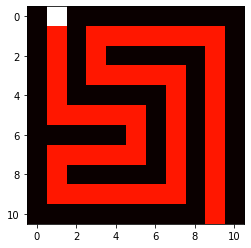

In [19]:
#define training parameters
discount_factor = 0.9
learning_rate = 0.9 
sampling_frequency = 10
number_of_episodes = 2000
epsilon = 0.1
epsilon_incrementor = 1/(0.9*number_of_episodes)

#image pixel data
original_data = data.copy()
data_array = np.zeros((environment_rows, environment_columns, int(number_of_episodes/sampling_frequency) ))

#metrics sotrage arrays
reward_array = []
episode_array_for_minmaxavg = []
min_reward_array = [] 
max_reward_array = []
avg_reward_array = []
number_of_steps_array = []
mean_q_values = []


for episode in range(number_of_episodes):
    #row_index, column_index = get_starting_location()    
    row_index = 0
    #column_index = 3 #maze 1
    #column_index = 5 #maze 2
    column_index = 1 #maze 3
    
    aggr_q_values = 0
    number_of_steps = 0
    aggr_reward = 0    
    
    while not is_terminal_state(row_index, column_index):
        action_index = get_next_action(row_index, column_index, epsilon)
        old_row_index, old_column_index = row_index, column_index 
        row_index, column_index = get_next_location(old_row_index, old_column_index, action_index)

        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value
        
        #metrics variables-------------------------------------------------------
        aggr_reward +=reward  
        number_of_steps += 1
        aggr_q_values += new_q_value
        #------------------------------------------------------------------------
        
    if epsilon < 1:
        epsilon += epsilon_incrementor
        
    
    reward_array.append(aggr_reward)    
    number_of_steps_array.append(number_of_steps)
    if number_of_steps > 0:
        mean_q_values.append(aggr_q_values/number_of_steps)
    else:
        mean_q_values.append(0)
    
    if episode%sampling_frequency ==  0:
        index = int(episode / sampling_frequency)  
        draw_shortest_path()
        data_array[:,:,index] = data.copy()
        data = original_data.copy()
        
        average_reward = sum(reward_array[-sampling_frequency:])/sampling_frequency
        min_reward = min(reward_array[-sampling_frequency:])
        max_reward = max(reward_array[-sampling_frequency:])       
        print("Index: ", index ,", Episode: ", episode,"Rewards-- min: ", min_reward ," max: ", max_reward, " avg: ", average_reward)

        episode_array_for_minmaxavg.append(episode)
        min_reward_array.append(min_reward)
        max_reward_array.append(max_reward)
        avg_reward_array.append(average_reward)

print('Training complete!')

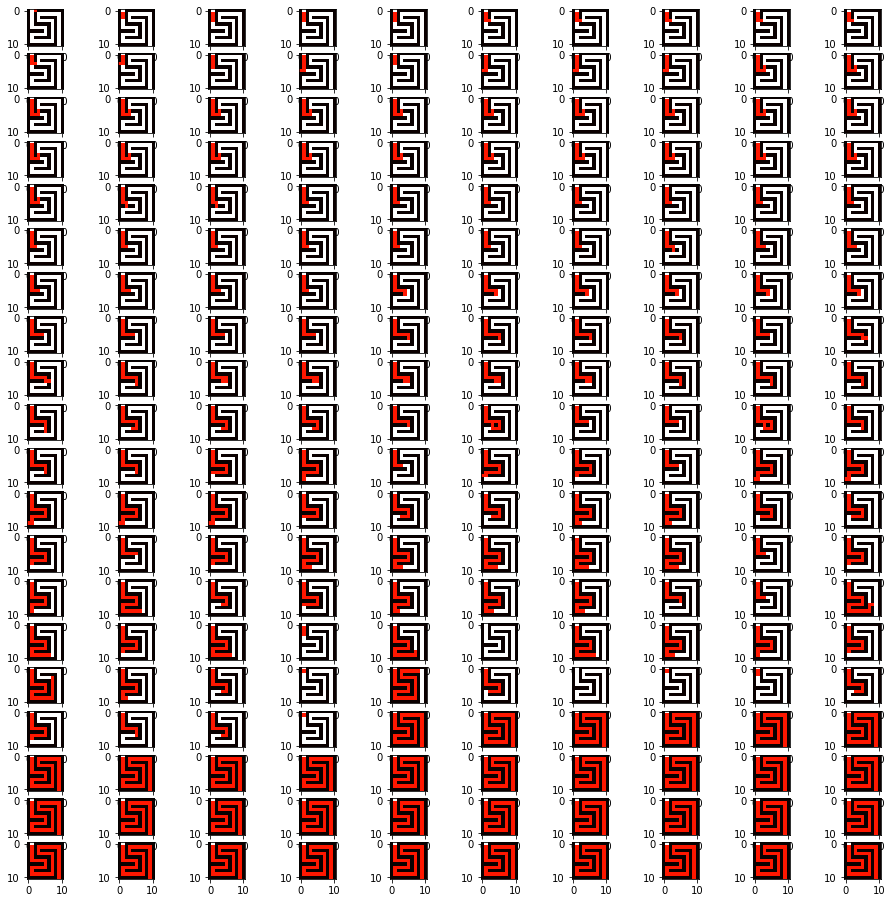

In [20]:
fig=plt.figure(figsize=(16, 16))
columns = 10
rows = 20
for i in range(1, columns*rows +1):
    img = data_array[:,:,i-1]
    fig.add_subplot(rows, columns, i)    
    plt.imshow(img, interpolation='nearest', cmap='hot')
plt.show()

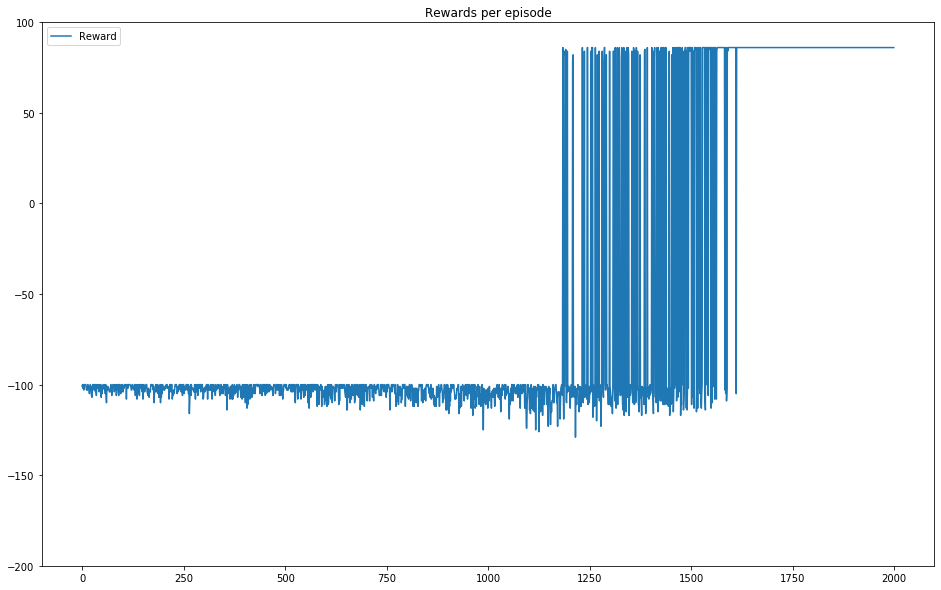

In [11]:
fig=plt.figure(figsize=(16, 10))
plt.plot(reward_array,  label="Reward" )
plt.ylim(-200, 100)
plt.title("Rewards per episode")
plt.legend(loc=2)
plt.show()

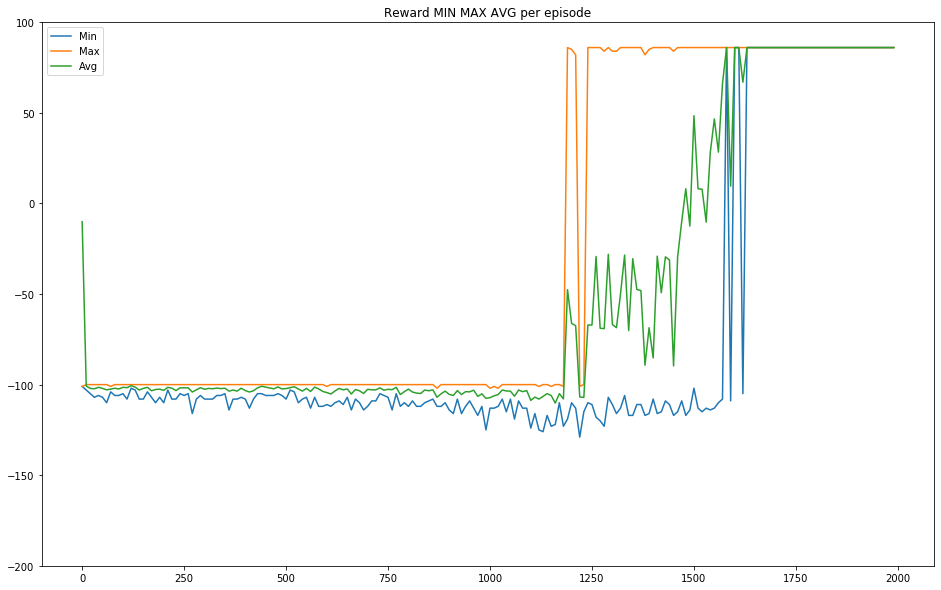

In [12]:
fig=plt.figure(figsize=(16, 10))
plt.plot(episode_array_for_minmaxavg, min_reward_array, label="Min" )
plt.plot(episode_array_for_minmaxavg, max_reward_array, label="Max" )
plt.plot(episode_array_for_minmaxavg, avg_reward_array, label="Avg" )
plt.title("Reward MIN MAX AVG per episode")
plt.ylim(-200, 100)
plt.legend(loc=2)
plt.show()

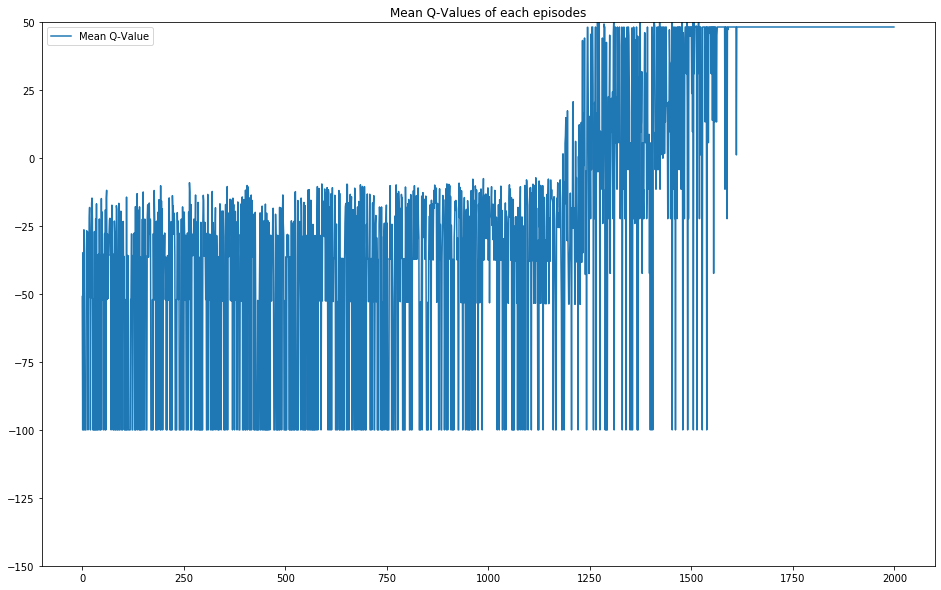

In [13]:
fig =plt.figure(figsize=(16, 10))
plt.plot(mean_q_values,  label="Mean Q-Value" )
plt.title("Mean Q-Values of each episodes")
plt.ylim(-150, 50)
plt.legend(loc=2)
plt.show()

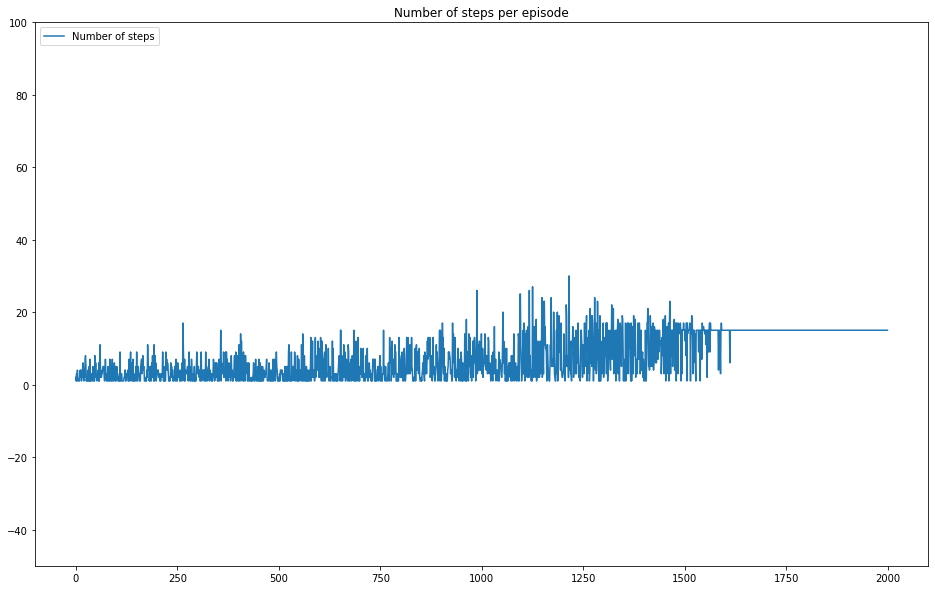

In [14]:
fig=plt.figure(figsize=(16, 10))
plt.plot(number_of_steps_array,  label="Number of steps" )
plt.title("Number of steps per episode")
plt.ylim(-50, 100)
plt.legend(loc=2)
plt.show()

In [6]:
import tensorflow as tf
tf.__version__

'2.2.0'